### Problem Statement:
Perform exploratory data analysis using the given **Bike Sharing Demand** dataset and data dictionary and come up with useful insights. You can use the **count** field as the target variable for this exercise

**Dataset**: https://drive.google.com/file/d/1cDPDsc0L89Q9m92rMsGvnbh9_P1NolpU/view?usp=sharing

**Data Dictionary**: https://drive.google.com/file/d/1Aa7NBi3zUr0k9tPXACk2OZcKKDp6q0QL/view?usp=sharing

## Solution

## Importing necessary libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**Viewing the Original data**

In [0]:
data=pd.read_csv('bike_sharing_demand.csv')
print(data.shape)
data.head()

(10901, 11)


,id,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,9,01/01/11 0:00,1,0,0,1,9.84,14.395,81,0.0,16
1,14,01/01/11 1:00,1,0,0,1,9.02,13.635,80,0.0,40
2,19,01/01/11 2:00,1,0,0,1,9.02,13.635,80,0.0,32
3,11,01/01/11 3:00,1,0,0,1,9.84,14.395,75,0.0,13
4,16,01/01/11 4:00,1,0,0,1,9.84,14.395,75,0.0,1


**Summary of continuous variables**

In [0]:
data.describe()

,id,season,holiday,workingday,weather,temp,humidity,windspeed,count
count,10901.000000,10901.000000,10901.000000,10901.000000,10901.000000,10896.000000,10901.000000,10897.000000,10901.000000
mean,10.442895,2.507018,0.028529,0.681038,1.418035,20.215371,61.892303,12.831764,195.635171
std,5.779938,1.117776,0.166488,0.466292,0.633616,7.877570,19.235416,9.650087,475.497567
min,1.000000,-1.000000,0.000000,-1.000000,1.000000,-103.400000,0.000000,-53.500000,0.000000
25%,5.000000,2.000000,0.000000,0.000000,1.000000,13.940000,47.000000,7.001500,42.000000
50%,10.000000,3.000000,0.000000,1.000000,1.000000,20.500000,62.000000,12.998000,145.000000
75%,15.000000,4.000000,0.000000,1.000000,2.000000,26.240000,77.000000,16.997900,283.000000
max,20.000000,5.000000,1.000000,1.000000,4.000000,41.000000,100.000000,546.000000,46098.000000


**Getting the data types of all variables**

In [0]:
data.dtypes

id              int64
datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp          object
humidity        int64
windspeed     float64
count           int64
dtype: object

## Removing dupicate rows

**These are the duplicate rows**

In [0]:
## Viewing the duplicate rows
duplicates_rows=data[data.duplicated()]
duplicates_rows

,id,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
148,19,01/01/11 2:00,1,0,0,1,9.02,13.635,80,0.0000,32
157,20,07/01/11 14:00,1,0,1,2,8.20,9.85,40,16.9979,50
162,16,07/01/11 19:00,1,0,1,1,6.56,9.85,55,6.0032,95
328,8,14/01/11 22:00,1,0,1,2,6.56,11.365,69,0.0000,36
10890,17,19/12/12 22:00,4,0,1,1,13.94,17.425,61,6.0032,129
10892,15,19/12/12 10:00,4,0,1,1,13.12,16.665,70,7.0015,164
10893,15,19/12/12 10:00,4,0,1,1,13.12,16.665,70,7.0015,164
10894,15,19/12/12 10:00,4,0,1,1,13.12,16.665,70,7.0015,164
10898,15,19/12/12 10:00,4,0,1,1,13.12,16.665,70,7.0015,164
10899,15,19/12/12 10:00,4,0,1,1,13.12,16.665,70,7.0015,164


**Keeping the first rows and removing its duplicate**

In [0]:
## Removing the duplicate rows
data = data.drop_duplicates(keep='first')
data.shape

(10890, 11)

## Converting necesary columns to there respective datatypes 

**Converting datetime from object to datetime format**

In [0]:
data['datetime']=pd.to_datetime(data['datetime'],dayfirst=True)
data.head(2)

,id,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,9,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,14,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40




---


**Converting season holiday workingday and weather from integer to category**

---


**Converting "feels like" temperature from object to numerical integer**

---

**Converting id from numeric to category**

In [0]:
## Converting all the four categorical features from int to category
col_to_be_categorical=['season','holiday','workingday','weather']
for cat in col_to_be_categorical:
  data[cat]=pd.Categorical(data[cat])

## Converting "feels like" temperature from object to numerical integer

data['atemp']=pd.to_numeric(data.atemp,errors='coerce') ## Values which cannot be parsed are converting into nan
a=data['atemp'].isna()
df=data[a]
print(df)

## Converting id from numeric to category
data['id']=pd.Categorical(data['id'])

       id            datetime season holiday  ... atemp humidity  windspeed  count
10824   8 2012-12-17 04:00:00      4       0  ...   NaN      100     0.0000      5
10895  15 2012-12-19 10:00:00      4       0  ...   NaN       70     7.0015    164

[2 rows x 11 columns]


## Missing value treatment

**Getting the count of NAN values in each columns**

In [0]:
data.isna().sum()

id            0
datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          5
atemp         2
humidity      0
windspeed     4
count         0
dtype: int64

### Removing rows with nan values (<1%)



In [0]:
data=data.dropna()
data.shape

(10879, 11)

## Statistics of continuous variables

In [0]:
data.describe()

,temp,atemp,humidity,windspeed,count
count,10879.000000,10879.000000,10879.000000,10879.000000,10879.000000
mean,20.227589,23.662854,61.889604,12.840033,195.756595
std,7.876853,8.470108,19.246264,9.653695,475.935308
min,-103.400000,0.760000,0.000000,-53.500000,0.000000
25%,13.940000,16.665000,47.000000,7.001500,42.000000
50%,20.500000,24.240000,62.000000,12.998000,145.000000
75%,26.240000,31.060000,77.000000,16.997900,284.000000
max,41.000000,45.455000,100.000000,546.000000,46098.000000


**Viewing the modified data for futher operations**

In [0]:
data.head(2)

,id,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,9,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,14,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40


## Outlier Treatment

### Removing outliers from season 

**Checking the outliers in Season column.**

---

**Counting the number of days in each season category using value_counts**

---

**There are three outliers present in season column**

 3    2733
 2    2733
 4    2729
 1    2681
-1       2
 5       1
Name: season, dtype: int64


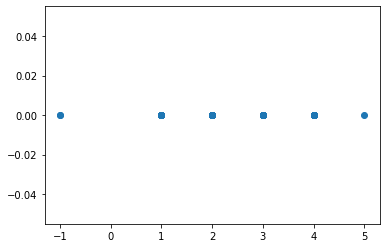

In [0]:
## Season column
plt.plot(data['season'],np.zeros_like(data['season']),'o')
print(data['season'].value_counts())

**Removing the two outliers in season column**

In [0]:
## Removing the outliers or garbage values in season column

data=data.drop(data[(data.season==5) | (data.season==-1)].index)
print(data.shape)

(10876, 11)


---
**Checking the outliers in holiday column using value counts**

---

**There are no outliers present in column season**

In [0]:
data.holiday.value_counts()

0    10565
1      311
Name: holiday, dtype: int64



---

**Checking the outliers in workingday column using value counts**

---

**One outlier is present i.e -1 which has to be removed**

In [0]:
data.workingday.value_counts()

 1    7401
 0    3474
-1       1
Name: workingday, dtype: int64

**Removing the outlier from workingday column**

In [0]:
## Removing outliers from working day
data=data.drop(data[data.workingday==-1].index)
print(data.shape)

(10875, 11)




---

**Checking the outliers in weather column**

---

**Getting count of each days across all weather, so no outliers are present.**

In [0]:
data.weather.value_counts()

1    7182
2    2834
3     858
4       1
Name: weather, dtype: int64

**Checking the outliers in temperature column**

Text(0.5, 1.0, 'temp with outliers')

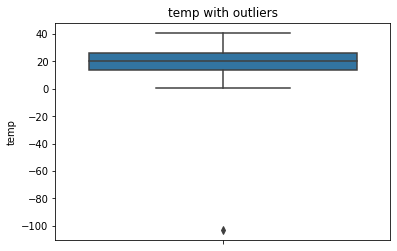

In [0]:
sns.boxplot(y=data['temp']).set_title('temp with outliers')

### Function to find outliers using IQR method

In [0]:
def low_up_bound(col):
  ## Finding quantile 1 and quantile 3
  lst=[]
  quan1,quan3=np.percentile(col,[25,75])
  #print(quan1,quan3)

  ## Finding IQR
  iqr=quan3-quan1
  #print(iqr)

  ## Finding upper bound and lower bound
  lower_bound_val=quan1-(1.5*iqr)
  upper_bound_val=quan3+(1.5*iqr)
  lst.append(lower_bound_val)
  lst.append(upper_bound_val)
  return lst
                    

**Finding the lower and upper bound values of temperature and humidity**

In [0]:
bound_temp=low_up_bound(data['temp'])
bound_humidity=low_up_bound(data['humidity'])
print('Temperature',bound_temp)
print('Humidity',bound_humidity)

Temperature [-4.51, 44.69]
Humidity [2.0, 122.0]


**Number of rows present in data**

In [0]:
print('number of rows is',data.shape[0])

number of rows is 10875


**Removing outliers from temperature using iqr function**

In [0]:
## Removing the outliers from  temp
data=data.drop(data[(data.temp<= bound_temp[0]) | (data.temp>= bound_temp[1])].index)

In [0]:
print('No of rows after outlier treatment',data.shape[0])

No of rows after outlier treatment 10874


**Checking outliers in temp after applying IQR function**

Text(0.5, 1.0, 'Temp after removing outliers')

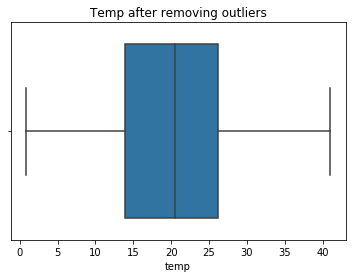

In [0]:
sns.boxplot(data['temp']).set_title('Temp after removing outliers')


**Checking outliers in atemp column, no outliers are present**

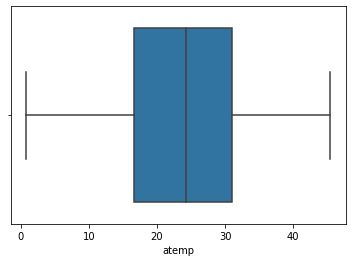

In [0]:
## atemp  column has no outliers
sns.boxplot(x=data['atemp'])

**Checking outliers in humidity column**

Text(0.5, 1.0, 'humidity with outliers')

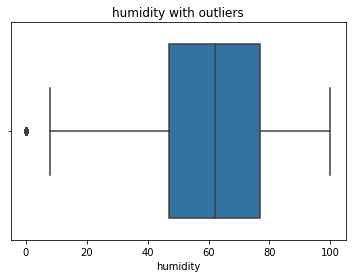

In [0]:
## Removing the outliers from  humidity
sns.boxplot(x=data['humidity']).set_title('humidity with outliers')

**Removing the outliers from humidity and check number of rows after removing outliers rows**

(10852, 11)


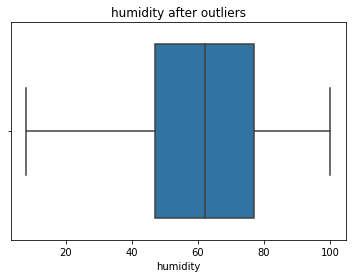

In [0]:
data=data.drop(data[(data.humidity<= bound_humidity[0]) | (data.humidity>= bound_humidity[1])].index)
sns.boxplot(data['humidity']).set_title('humidity after outliers')
print(data.shape)

**Checking the outliers in windspeed column**

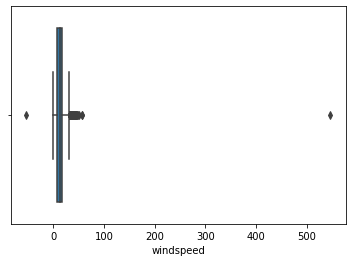

In [0]:
sns.boxplot(x=data['windspeed'])

**Check for outliers in count column**

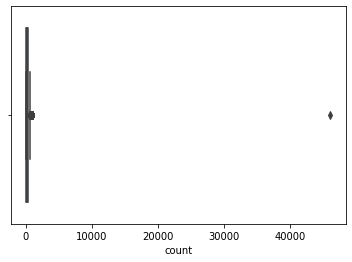

In [0]:
sns.boxplot(data['count'])

### Using 3rd standard deviaton method to remove outliers from count and windspeed column

In [0]:
## Replacing count outliers
for var in ["count","windspeed"]:
  data = data[np.abs(data[var]-data[var].mean())<=(3*data[var].std())]

## Correlation matrix of continuous variables



---

**temp and atemp is highly correlated**

---

**Rest all the variables not very much correlated**

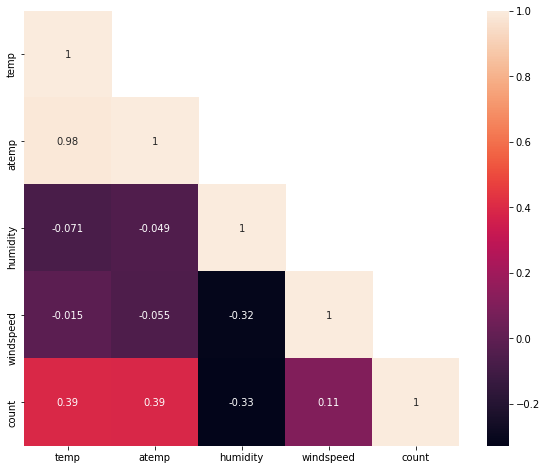

In [0]:
cor_mat = data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,8)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

## Feature engineering

**Extracting important information from date-time as follows**

*   year
*   month
*   day
*   hour
*   weekdays



In [0]:
data['year']=data.datetime.dt.year
data['month']=data.datetime.dt.month
data['day']=data.datetime.dt.day
data['hour']=data.datetime.dt.hour
data['weekday']=data.datetime.dt.weekday_name

**Dropping date-time column after extracting important information**

In [0]:
data.drop('datetime', axis=1, inplace=True)

**Dropping the id column**

In [0]:
data.drop('id', axis=1, inplace=True)

## Mapping the columns with respective values for better interpretation

**Mapped columns- season, weather, holiday, workingday**


**Workingday and holiday**

*   0 - 'no'
*   1 - 'yes'


**Season**


*   1- spring
*   2- summer
*   3- Fall
*   4- Winter

**Weather**

*   1- clear
*   2- mist cloudy
*   3- lightrain + snow + storm
*   4- heavyrain + thunderstorm





In [0]:
data['season'] = data.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
data['holiday']=data.holiday.map({1:"yes",0:"no"})
data['workingday']=data.workingday.map({1:"yes",0:"no"})

In [0]:
data['weather']=data.weather.map({1:"clear",2:"mist cloudy",3:"lightrain+snow+storm",4:"heavyrain+thunderstorm"})

**Viewing the data after mapping**

In [0]:
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour,weekday
0,Spring,no,no,clear,9.84,14.395,81,0.0,16,2011,1,1,0,Saturday
1,Spring,no,no,clear,9.02,13.635,80,0.0,40,2011,1,1,1,Saturday
2,Spring,no,no,clear,9.02,13.635,80,0.0,32,2011,1,1,2,Saturday
3,Spring,no,no,clear,9.84,14.395,75,0.0,13,2011,1,1,3,Saturday
4,Spring,no,no,clear,9.84,14.395,75,0.0,1,2011,1,1,4,Saturday


## Visualization

### Univariate analysis

*For non-categorical data*

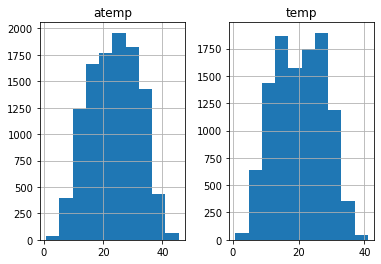

In [0]:
df=data[['temp','atemp']]
hist=df.hist(bins=10)

**atemp is better normalized than temp**


*   feel temperature can be used for better results




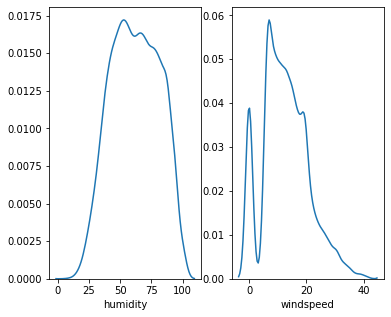

In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(6, 5)
sns.distplot(data['humidity'],hist=False,bins=20,ax=ax[0])
sns.distplot(data['windspeed'],hist=False,bins=20,ax=ax[1])

**For categorical data**




**Clearly working days are more than holidays**


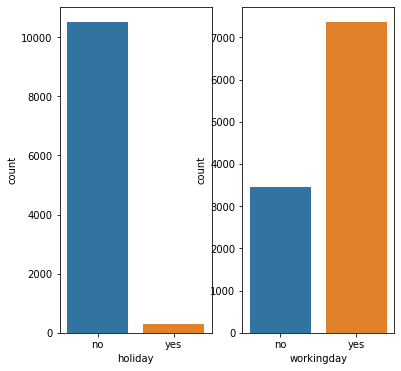

In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(6, 6)
sns.countplot(x='holiday',data=data,ax=ax[0])
sns.countplot(x='workingday',data=data,ax=ax[1])




*   Season in a year have equal interval
*   In a year clear weather is most frequent, light rain and thunderstorm is negligible




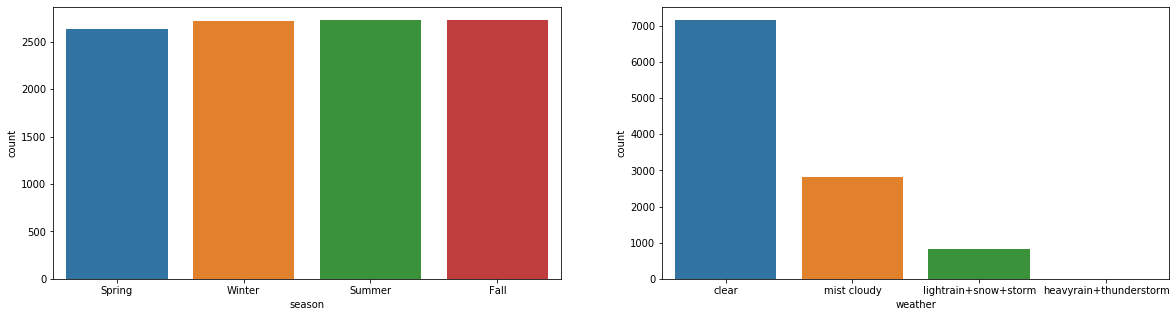

In [0]:
fig, ax =plt.subplots(1,2)
fig.set_size_inches(20,5)
sns.countplot(x='season',data=data,ax=ax[0])
sns.countplot(x='weather',data=data,ax=ax[1])

**Insights from univariate analysis**



*   Across any season working day is more than holidays
*   Working days reduces as weather conditions is going bad



###Bivariate Analysis

**average temp is highest in fall then summer then winter and lowest in spring**

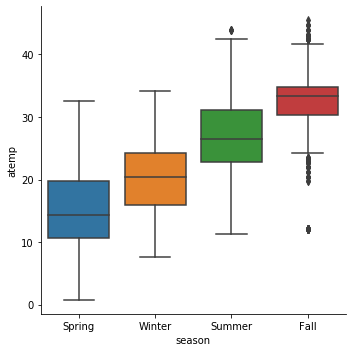

In [0]:
sns.catplot(x='season', y='atemp', kind='box', data=data)

**Across all seasons humidity is more on light-rain+ snow+ storm and least on clear weather**

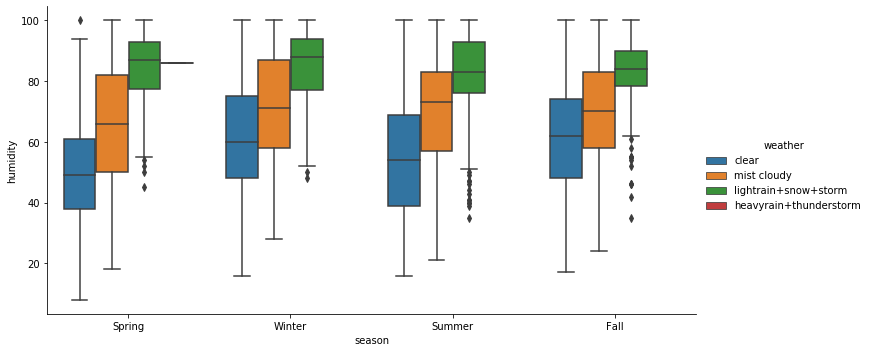

In [0]:
sns.catplot(x="season", y="humidity", hue="weather", kind="box", data=data,height=5,aspect=2);



*   Checking relationship of windspeed and humidity across each season
*   Checking relationship of windspeed and humidity across all weathers



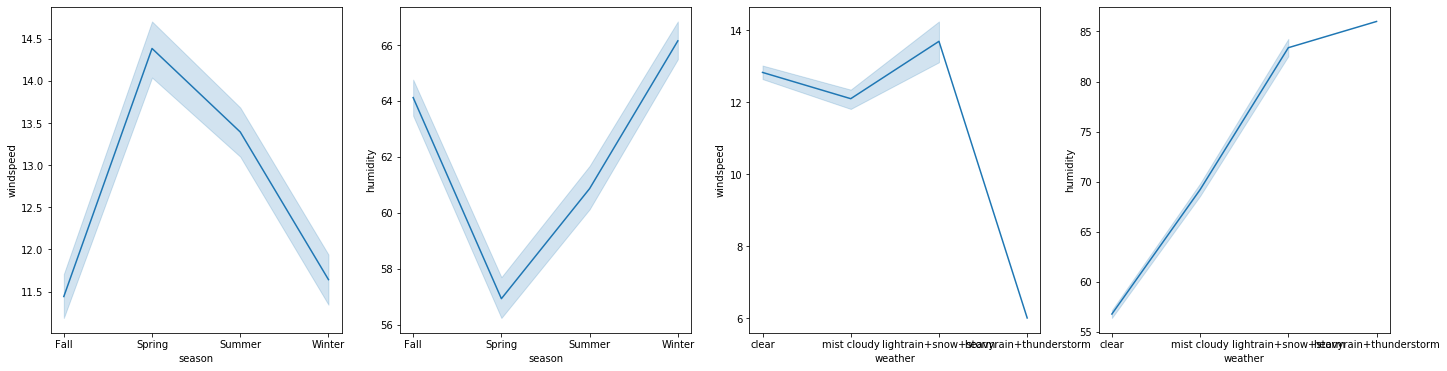

In [0]:
fig, axs = plt.subplots(ncols=4)
fig.set_size_inches(24, 6)
sns.lineplot(x='season',y='windspeed',data=data,ax=axs[0])
sns.lineplot(x='season',y='humidity',data=data,ax=axs[1])
sns.lineplot(x='weather',y='windspeed',data=data,ax=axs[2])
sns.lineplot(x='weather',y='humidity',data=data,ax=axs[3])



---

**Temperature is more in fall and summer season while its less in winter and spring categorised by months**


---

**Variation of temperature with respect to hours of the day**

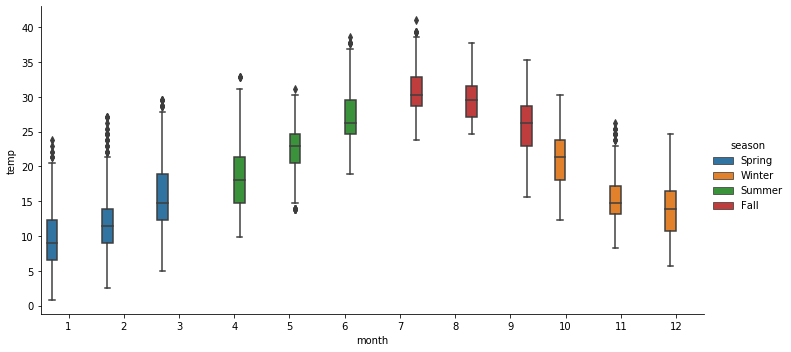

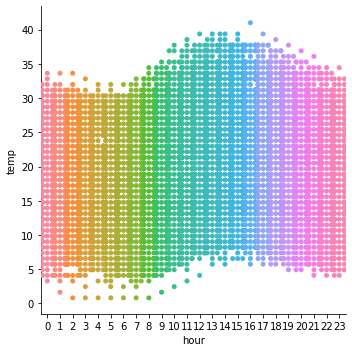

In [0]:
sns.catplot(x="month", y="temp", hue="season", kind="box", data=data,aspect=2);
sns.catplot(x="hour", y="temp", kind="swarm", data=data);

**Using pairplot to see the relationship between two variables**

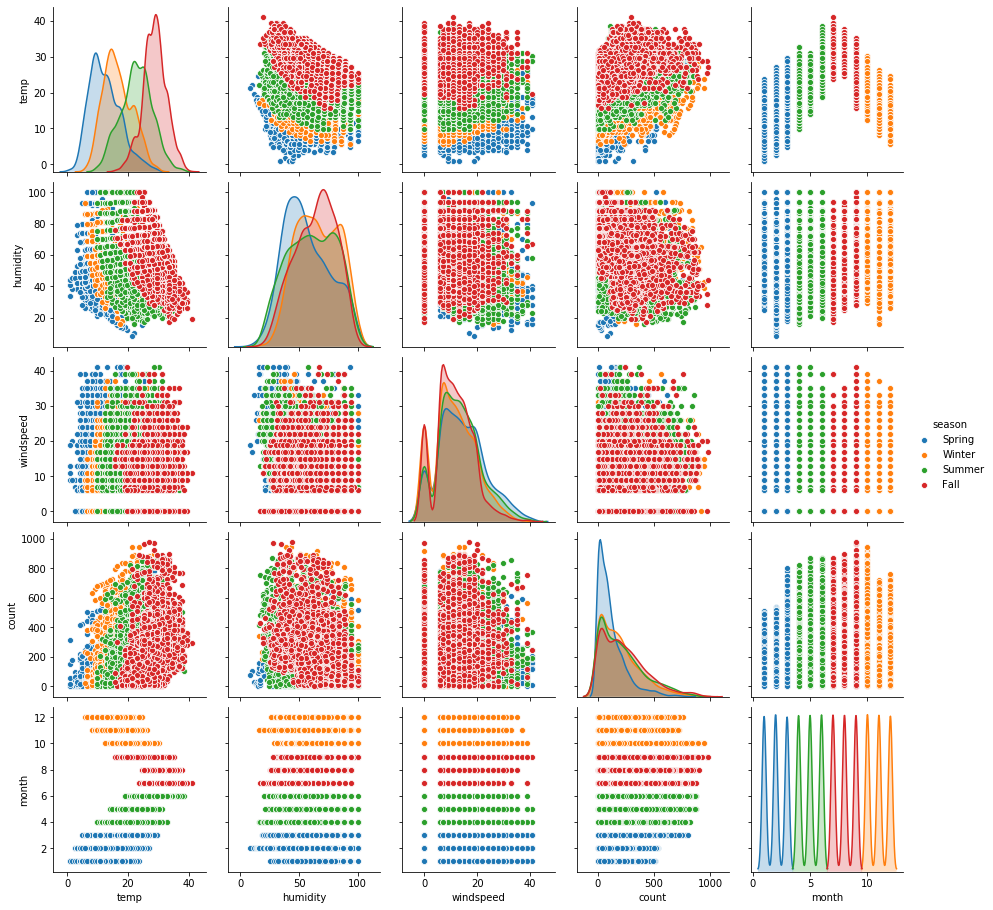

In [0]:
sns.pairplot(data=data,vars=['temp','humidity','windspeed','count','month'],hue='season')

**Insights from above graph**

*   Usually humidity is less when temperature is more
*   Count is more when temperature is high
*   Count is more in 6 to 8 month





---

**1. Count variable varies across differnt hours of the day**

---

**2. Count variable is varying for differnt hours across different seasons.**

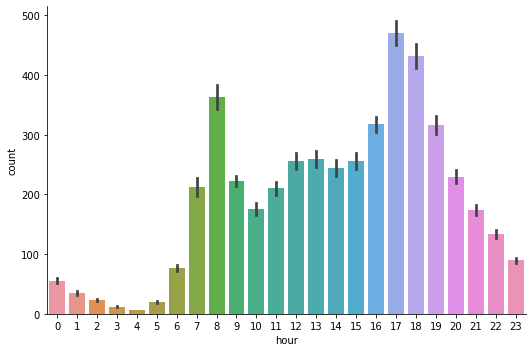

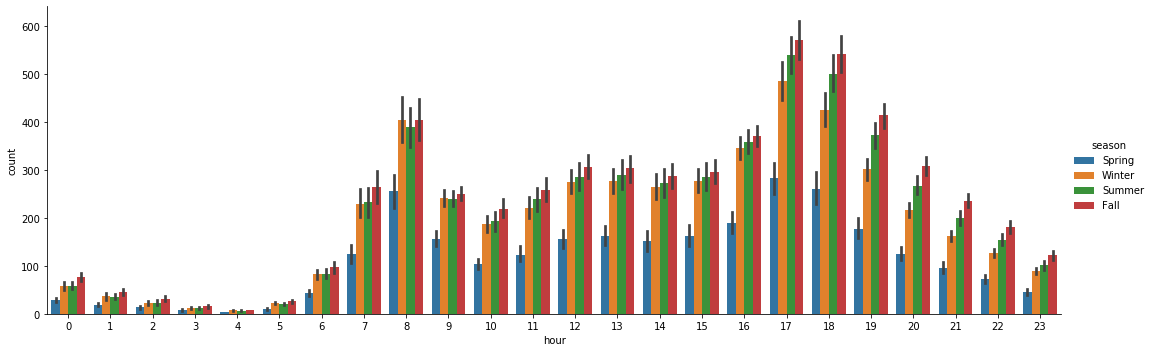

In [0]:
sns.catplot(x='hour', y='count', data=data, kind='bar', height=5, aspect=1.5)
sns.catplot(x='hour', y='count',hue='season', data=data, kind='bar', height=5, aspect=3)

**Variation of count with days of the week**

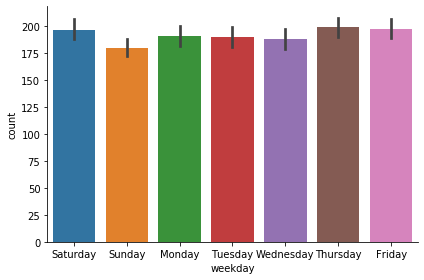

In [0]:
sns.catplot(x='weekday', y='count', data=data, kind='bar', height=4, aspect=1.5)

**Variation of count with respect to differnt day in a month**

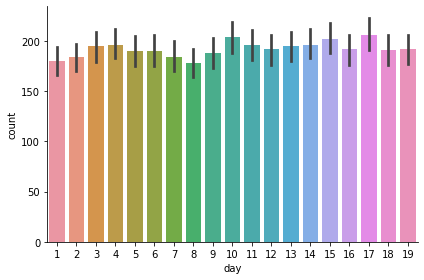

In [0]:
sns.catplot(x='day', y='count', data=data, kind='bar', height=4, aspect=1.5)

**Bike rents is more in fall season and least in spring season**

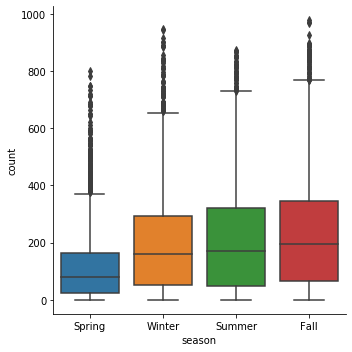

In [0]:
sns.catplot(x="season", y="count", kind="box", data=data);

**Creating bins of regular intervals for temperature**

In [0]:
new_data = data.copy()
new_data['temp_bin'] = np.floor(new_data['temp'])//5
new_data['humidity_bin']=np.floor(new_data['humidity'])//10
new_data['temp_bin'].unique()
new_data['humidity_bin'].unique()

array([ 8.,  7.,  9., 10.,  6.,  5.,  4.,  3.,  2.,  1.,  0.])

**Bike rents increases an temperature increses and decreases as humidity increses**


Text(0.5, 6.79999999999999, 'Temperature')

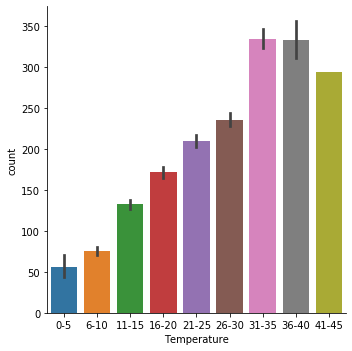

In [0]:
sns.catplot(x='temp_bin', y='count', data=new_data, kind='bar')
plt.xticks(np.arange(9), ('0-5','6-10', '11-15', '16-20', '21-25', '26-30','31-35','36-40','41-45'))
plt.xlabel('Temperature')

Text(0.5, 6.79999999999999, 'Humidity')

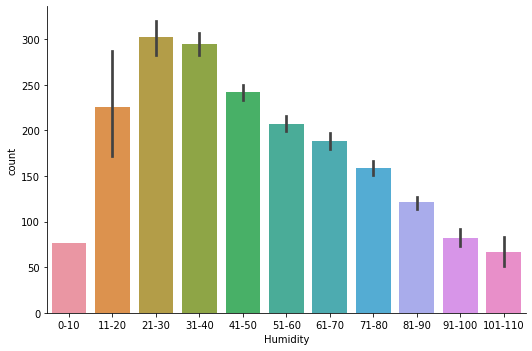

In [0]:
sns.catplot(x='humidity_bin', y='count', data=new_data, kind='bar',aspect=1.5)
plt.xticks(np.arange(11), ('0-10','11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80','81-90','91-100','101-110'))
plt.xlabel('Humidity')

**Variation of count across different months**

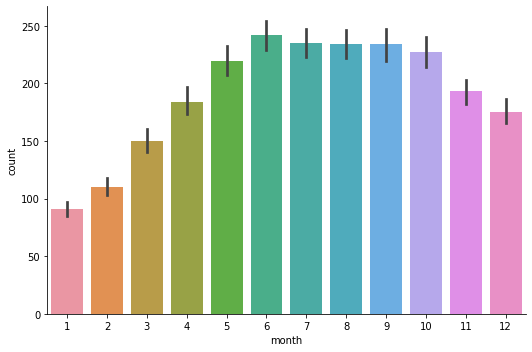

In [0]:
sns.catplot(x='month', y='count', data=data, kind='bar', height=5, aspect=1.5)

**Bike rents is more in 2012 than 2011**

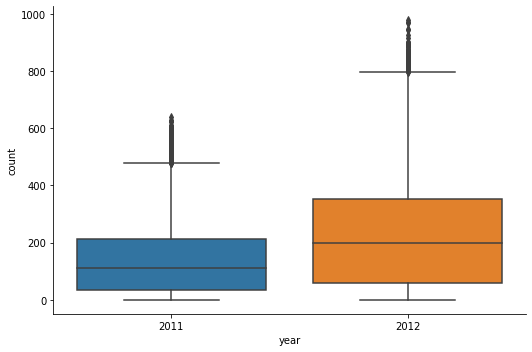

In [0]:
sns.catplot(x='year', y='count', data=data, kind='box', height=5, aspect=1.5)

**Bike rented is more in clear weather**

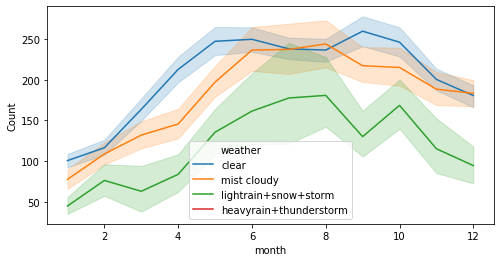

In [0]:
plt.figure(figsize = (8,4))
sns.lineplot(x = 'month', y = 'count', data = data, hue = 'weather')
plt.ylabel('Count')
plt.show()

**Bike rented is different in case of working days and holidays**

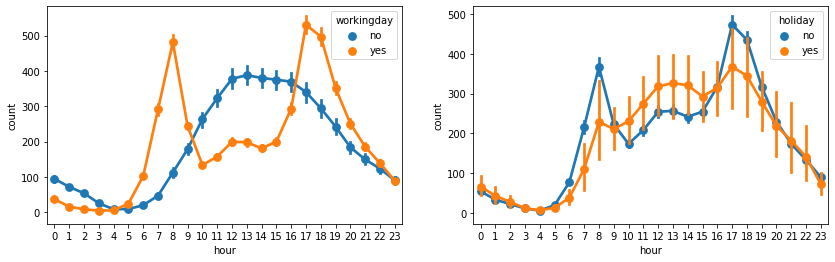

In [0]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(14, 4)
sns.pointplot(x = 'hour', y = 'count', data = data,hue = 'workingday',ax=axs[0])
sns.pointplot(x = 'hour', y = 'count', data = data,hue = 'holiday',ax=axs[1])

**As expected bike rented in working days is more**

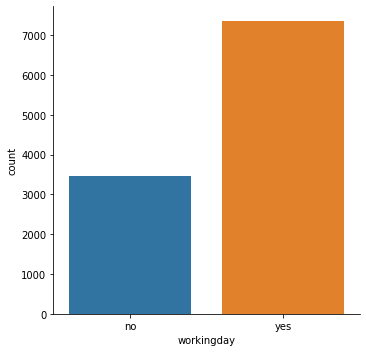

In [0]:
sns.catplot(x='workingday', data=data, kind='count')

**Variation in bike rents in weekends and weekdays**

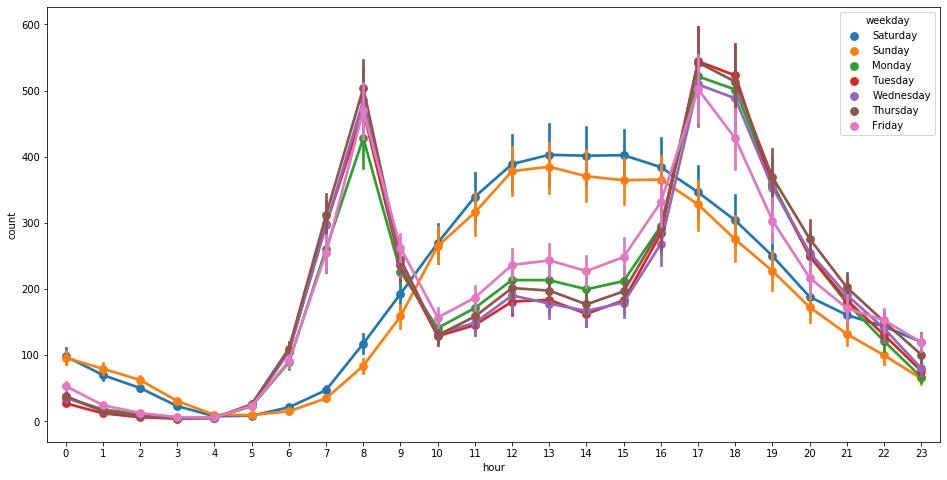

In [0]:
plt.figure(figsize=(16,8))
sns.pointplot('hour','count',hue = 'weekday',data = data)

**Insights from this plot**

*   Highest rents are in clear weather so considering only clear weather.
*   In clear weather accoss all season bike rented is almost equal with more rents in fall and summer season



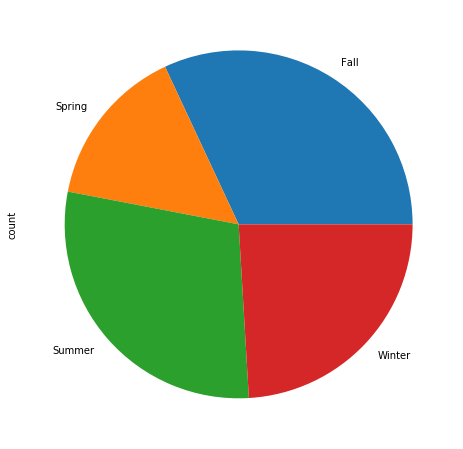

In [0]:
data[data['weather'] =='clear'].groupby(['season'])['count'].sum().plot(kind='pie', figsize=(12,8))